<a href="https://colab.research.google.com/github/plymburner/World_Weather_Analysis/blob/main/WeatherPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.772651804050554 131.5118040421243
-60.077954356135606 -158.26695780278183
21.740652861739193 -148.80255870638987
87.42719044336528 140.4682866866873
-78.75150649861905 -84.95847340580039
-26.03235039666282 -90.80435109225586
28.372803119937927 -31.844836898301452
-15.160862622716607 -168.81172182588688
22.975604584281413 18.12795704420006
8.861484687354064 -34.52528267797854
-11.867999620152219 93.14788410346097
-22.034231877207702 -126.52597180571593
45.00302403340922 22.757822138079632
-46.41510964875869 16.045234012678065
45.38214553292855 -51.43458535326823
-21.835937288654833 134.49894896457022
26.103123338998273 -103.1689671494545
34.98973689150836 -23.48902713822406
-2.54753115496473 -136.30596489307146
45.813585250148236 91.78183916642013
69.62140564296809 -13.421411334816554
41.0521966238166 34.958914516868504
-43.52647348952183 -111.49964953407964
39.43299072574098 73.91712158914967
-69.72714908362528 -20.534847286878886
65.86662690692273 -72.97603363639374
73.765109158123

In [5]:
pip install citipy

  Running setup.py install for citipy: started
    Running setup.py install for citipy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.3, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [5]:
import requests
requests.__version__

'2.27.1'

In [7]:
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [9]:
import requests
requests.__version__

'2.27.1'

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stoyba
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | satitoa
City not found. Skipping...
Processing Record 9 of Set 1 | marzuq
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ponoarele
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | tlahualilo
City not found. Skipping...
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | atuona
Processing Recor

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,56.50,75,96,9.26,NZ,2022-11-09 03:01:47
1,Hilo,19.7297,-155.0900,74.25,90,100,4.61,US,2022-11-09 03:01:47
2,Ushuaia,-54.8000,-68.3000,38.66,96,46,5.75,AR,2022-11-09 03:01:47
3,Ribeira Grande,38.5167,-28.7000,65.77,85,89,8.01,PT,2022-11-09 03:01:48
4,Marzuq,14.4000,46.4667,63.05,51,3,4.32,YE,2022-11-09 03:01:48
5,Sao Filipe,14.8961,-24.4956,77.67,68,71,9.80,CV,2022-11-09 03:01:49
6,Bengkulu,-3.8004,102.2655,81.75,72,100,2.48,ID,2022-11-09 03:01:49
7,Rikitea,-23.1203,-134.9692,75.56,88,94,13.47,PF,2022-11-09 03:01:49
8,Ponoarele,44.9739,22.7644,47.35,92,3,3.24,RO,2022-11-09 03:01:50
9,Hermanus,-34.4187,19.2345,52.81,79,9,12.35,ZA,2022-11-09 03:01:50


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-11-09 03:01:47,-46.1927,168.8643,56.50,75,96,9.26
1,Hilo,US,2022-11-09 03:01:47,19.7297,-155.0900,74.25,90,100,4.61
2,Ushuaia,AR,2022-11-09 03:01:47,-54.8000,-68.3000,38.66,96,46,5.75
3,Ribeira Grande,PT,2022-11-09 03:01:48,38.5167,-28.7000,65.77,85,89,8.01
4,Marzuq,YE,2022-11-09 03:01:48,14.4000,46.4667,63.05,51,3,4.32
5,Sao Filipe,CV,2022-11-09 03:01:49,14.8961,-24.4956,77.67,68,71,9.80
6,Bengkulu,ID,2022-11-09 03:01:49,-3.8004,102.2655,81.75,72,100,2.48
7,Rikitea,PF,2022-11-09 03:01:49,-23.1203,-134.9692,75.56,88,94,13.47
8,Ponoarele,RO,2022-11-09 03:01:50,44.9739,22.7644,47.35,92,3,3.24
9,Hermanus,ZA,2022-11-09 03:01:50,-34.4187,19.2345,52.81,79,9,12.35


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

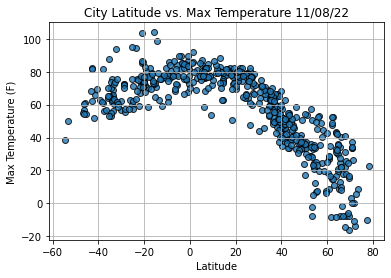

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

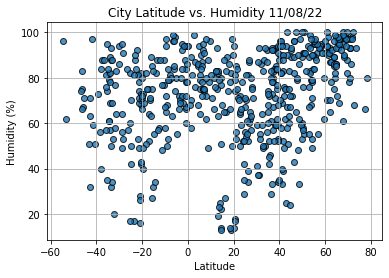

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

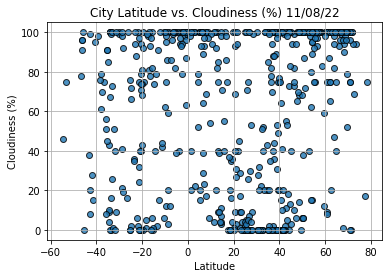

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

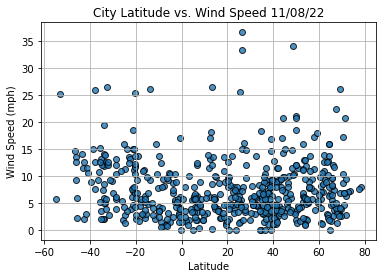

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
#     return plot_linear_regression

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2022-11-09 03:01:47,19.7297,-155.0900,74.25,90,100,4.61
3,Ribeira Grande,PT,2022-11-09 03:01:48,38.5167,-28.7000,65.77,85,89,8.01
4,Marzuq,YE,2022-11-09 03:01:48,14.4000,46.4667,63.05,51,3,4.32
5,Sao Filipe,CV,2022-11-09 03:01:49,14.8961,-24.4956,77.67,68,71,9.80
8,Ponoarele,RO,2022-11-09 03:01:50,44.9739,22.7644,47.35,92,3,3.24
...,...,...,...,...,...,...,...,...,...
535,Sorland,NO,2022-11-09 03:15:53,67.6670,12.6934,40.86,61,1,22.46
536,Mayna,RU,2022-11-09 03:15:54,54.1135,47.6231,34.39,79,100,12.91
537,Lazaro Cardenas,MX,2022-11-09 03:14:21,17.9583,-102.2000,78.22,86,37,3.20
539,Nador,MA,2022-11-09 03:15:54,35.1740,-2.9287,68.25,73,0,8.05


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2022-11-09 03:01:47,19.7297,-155.0900,74.25,90,100,4.61
3,Ribeira Grande,PT,2022-11-09 03:01:48,38.5167,-28.7000,65.77,85,89,8.01
4,Marzuq,YE,2022-11-09 03:01:48,14.4000,46.4667,63.05,51,3,4.32
5,Sao Filipe,CV,2022-11-09 03:01:49,14.8961,-24.4956,77.67,68,71,9.80
8,Ponoarele,RO,2022-11-09 03:01:50,44.9739,22.7644,47.35,92,3,3.24


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Testing Block
# print(northern_hemi_df)
# print(southern_hemi_df)

              City Country                 Date      Lat       Lng  Max Temp  \
0          Mataura      NZ  2022-11-09 03:01:47 -46.1927  168.8643     56.50   
2          Ushuaia      AR  2022-11-09 03:01:47 -54.8000  -68.3000     38.66   
6         Bengkulu      ID  2022-11-09 03:01:49  -3.8004  102.2655     81.75   
7          Rikitea      PF  2022-11-09 03:01:49 -23.1203 -134.9692     75.56   
9         Hermanus      ZA  2022-11-09 03:01:50 -34.4187   19.2345     52.81   
..             ...     ...                  ...      ...       ...       ...   
522   Jacareacanga      BR  2022-11-09 03:15:50  -6.2222  -57.7528     72.30   
524           Poum      NC  2022-11-09 03:15:50 -20.2333  164.0167     77.07   
532          Kuito      AO  2022-11-09 03:15:53 -12.3833   16.9333     59.36   
534  Victor Harbor      AU  2022-11-09 03:15:53 -35.5667  138.6167     87.67   
538  Kasongo-Lunda      CD  2022-11-09 03:15:54  -6.4667   16.8167     69.71   

     Humidity  Cloudiness  Wind Speed  